# ECMT 475 - Economic Forecasting

In [6]:
library(ggplot2)
library("lubridate")
library('Quandl')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [9]:
Quandl.api_key("UMo9bYuaDpyAy55mMfGS")
Data=Quandl(c('FRED/WCOILWTICO','FRED/DGS10', 'FRED/DTWEXM'),collapse='weekly',type="xts")
copper = read.csv("~/Downloads/Copper.csv")
dates = seq(as.Date("1988-07-31"), length = length(copper$Price), by = "weeks")
copper = xts(rev(copper$Price), order.by = dates)
data=merge(Data,copper, all = FALSE)
data_ts=ts(data,start=c(year(data)[1],week(data)[1]),frequency =365.25/7)

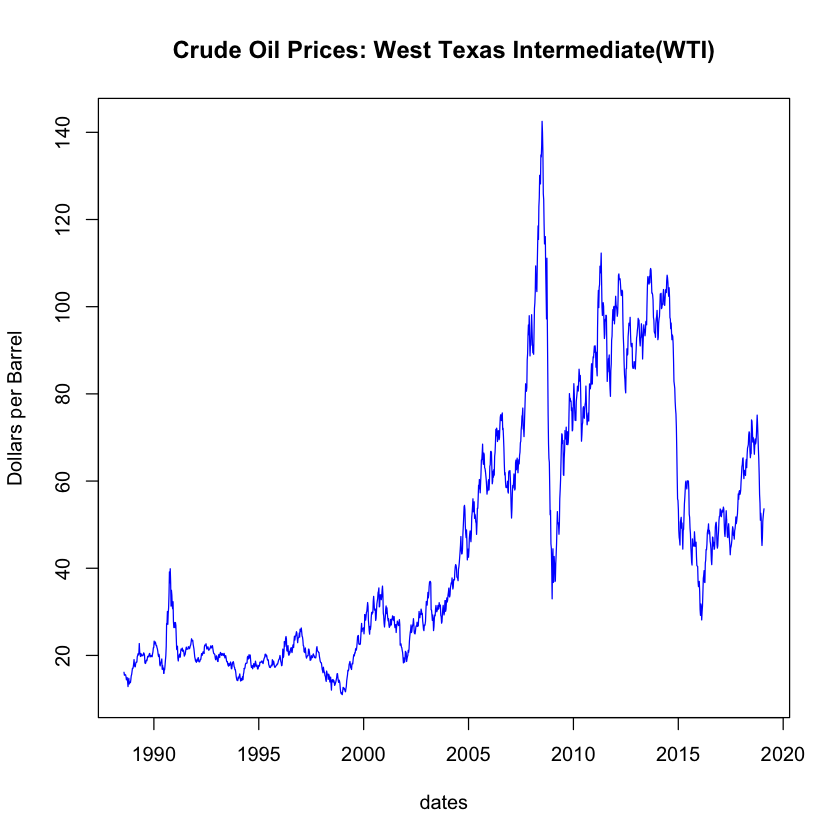

In [10]:
plot(data_ts[,1],main="Crude Oil Prices: West Texas Intermediate(WTI)",xlab="dates",ylab="Dollars per Barrel",type="l",col="blue")


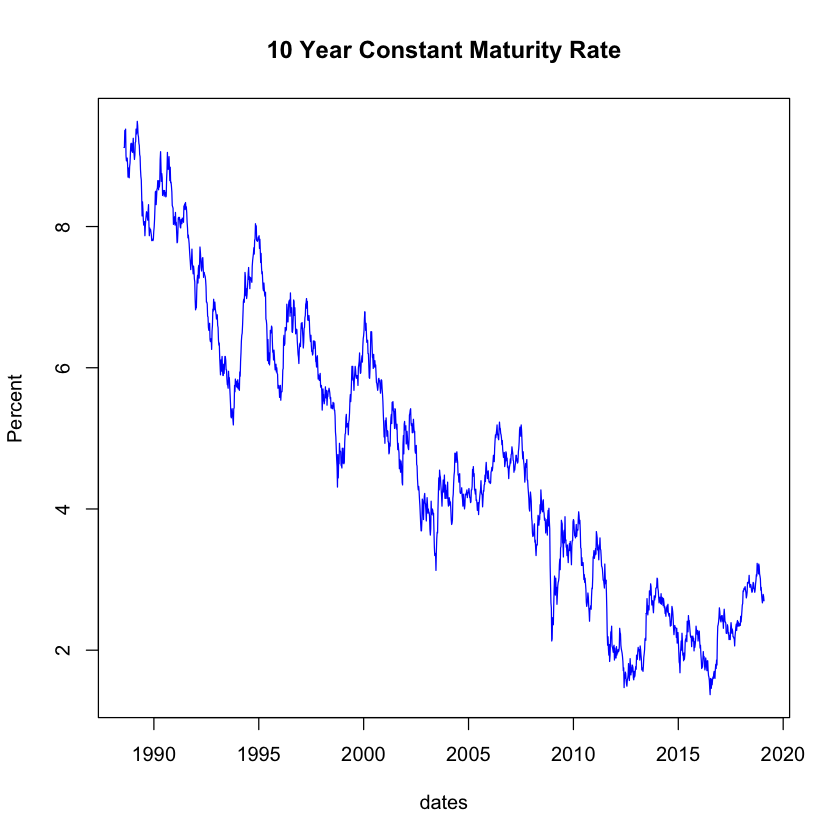

In [11]:
plot(data_ts[,2],main="10 Year Constant Maturity Rate",xlab="dates",ylab="Percent",type="l",col="blue")

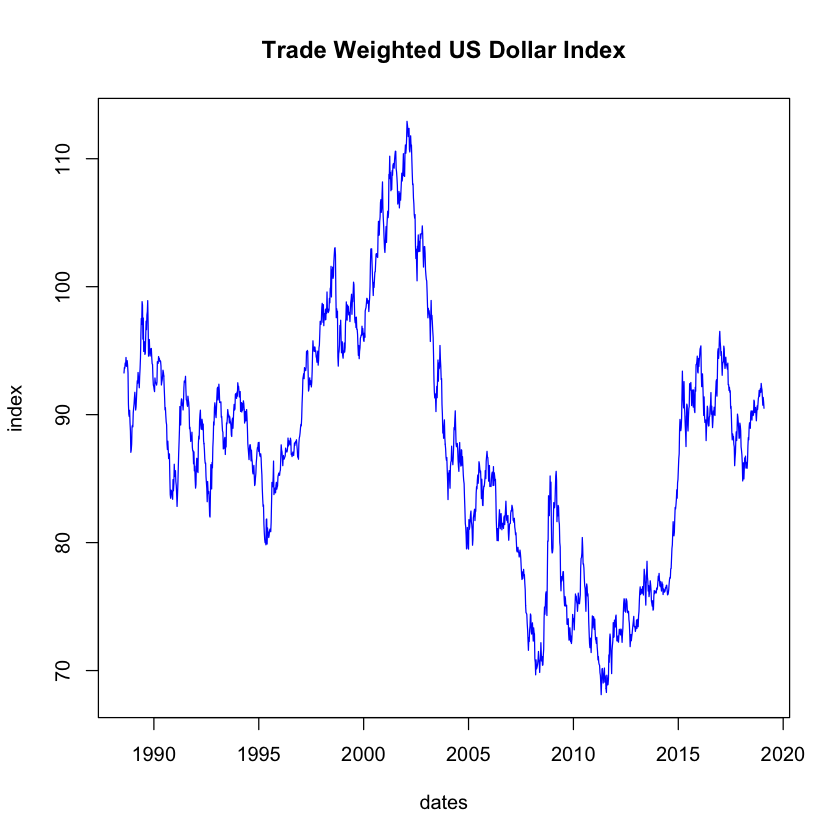

In [12]:
plot(data_ts[,3],main="Trade Weighted US Dollar Index",xlab="dates",ylab="index",type="l",col="blue")

In [13]:
goil=diff(data_ts[,1])/ stats::lag(data_ts[,1],-1)*100
gcopper=diff(data_ts[,4])/ stats::lag(data_ts[,4],-1)*100
gexchange = diff(data_ts[,3]) / stats::lag(data_ts[,3],-1) * 100

In [14]:
# log formation
lgoil=100*diff(log(data_ts[,1]))  
lgcopper=100*diff(log(data_ts[,4]))
lgexchange=100*diff(log(data_ts[,3]))

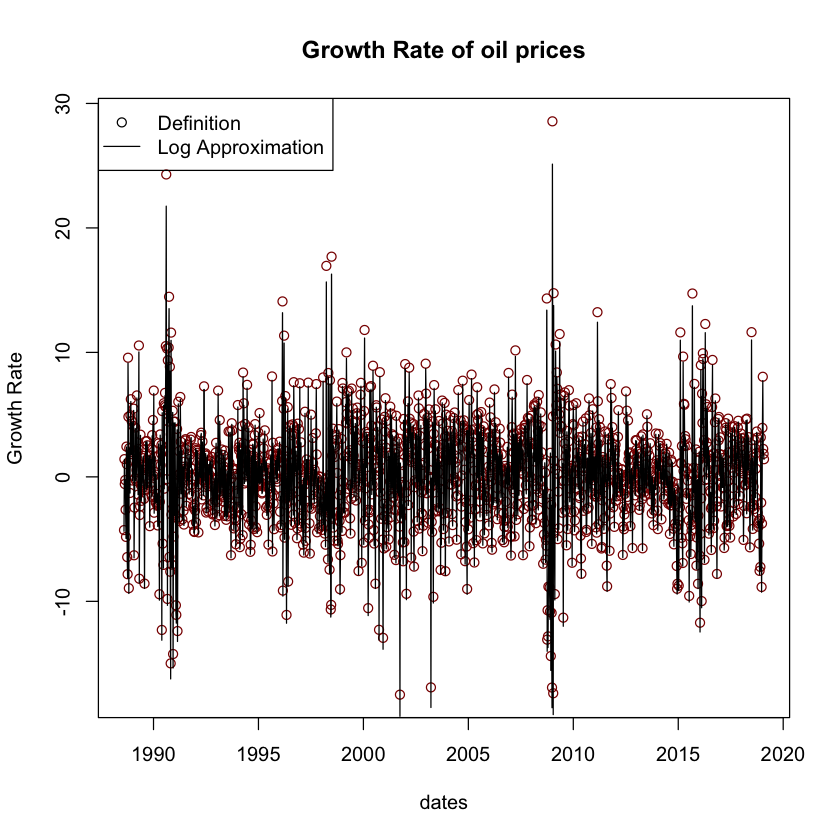

In [15]:
plot(goil,type='p',main='Growth Rate of oil prices',ylab='Growth Rate',xlab='dates',col = "dark red")
lines(lgoil)
legend('topleft',c('Definition','Log Approximation'),pch=c(1,-1),lty=c(0,1))

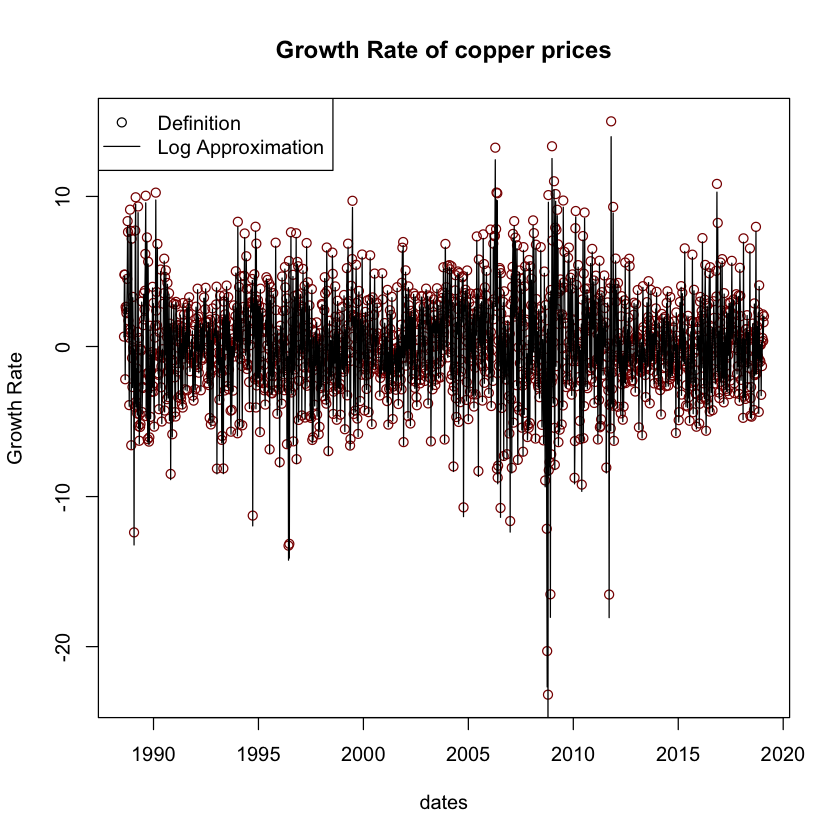

In [16]:
plot(gcopper,type='p',main='Growth Rate of copper prices',ylab='Growth Rate',xlab='dates',col = "dark red")
lines(lgcopper)
legend('topleft',c('Definition','Log Approximation'),pch=c(1,-1),lty=c(0,1))

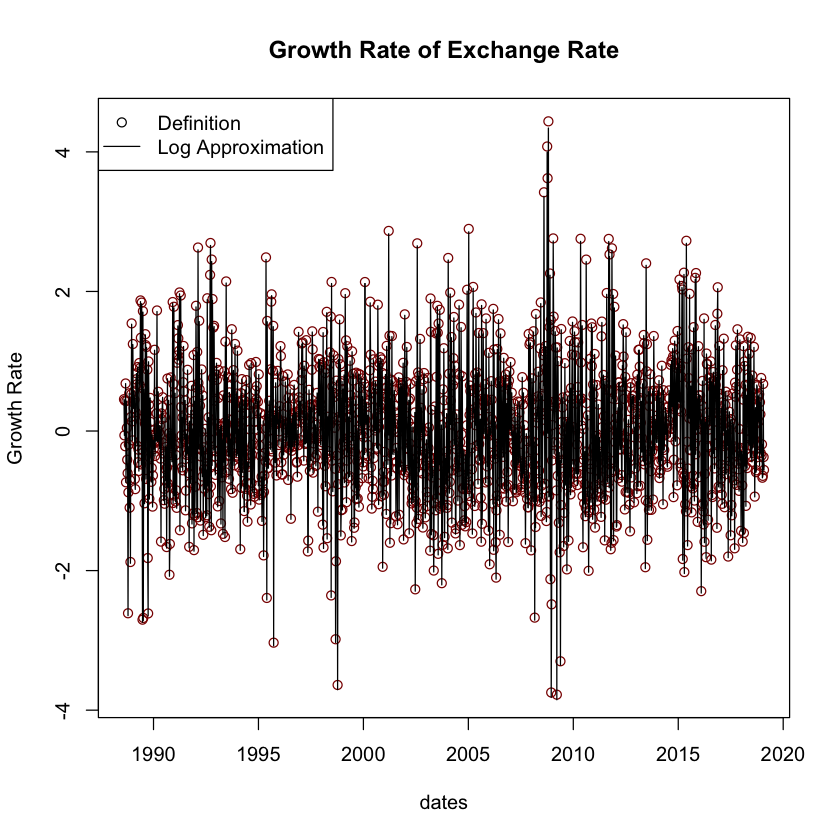

In [17]:
plot(gexchange,type='p',main='Growth Rate of Exchange Rate',ylab='Growth Rate',xlab='dates',col = "dark red")
lines(lgexchange)
legend('topleft',c('Definition','Log Approximation'),pch=c(1,-1),lty=c(0,1))

In [19]:
head(data_ts)

FRED.WCOILWTICO...Value,FRED.DGS10...Value,FRED.DTWEXM...Value,copper
16.14,9.12,93.2583,0.912
15.45,9.12,93.6837,0.918
15.67,9.36,93.6254,0.962
15.58,9.35,94.0332,1.008
15.54,9.38,93.8281,0.986
15.13,9.00,94.4675,1.012


In [20]:
modelfull=lm(lgoil~lgcopper+lgexchange)
summary(modelfull)


Call:
lm(formula = lgoil ~ lgcopper + lgexchange)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.5446  -2.3067   0.1547   2.4419  24.7613 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.07050    0.10427   0.676   0.4990    
lgcopper     0.05134    0.02897   1.772   0.0765 .  
lgexchange  -0.67712    0.11074  -6.115 1.22e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.159 on 1589 degrees of freedom
Multiple R-squared:  0.02524,	Adjusted R-squared:  0.02402 
F-statistic: 20.57 on 2 and 1589 DF,  p-value: 1.507e-09


In [21]:
fitvalue=ts(modelfull$fitted.value)
fitvalue=ts(fitvalue,start=start(lgoil),freq=365.25/7) 

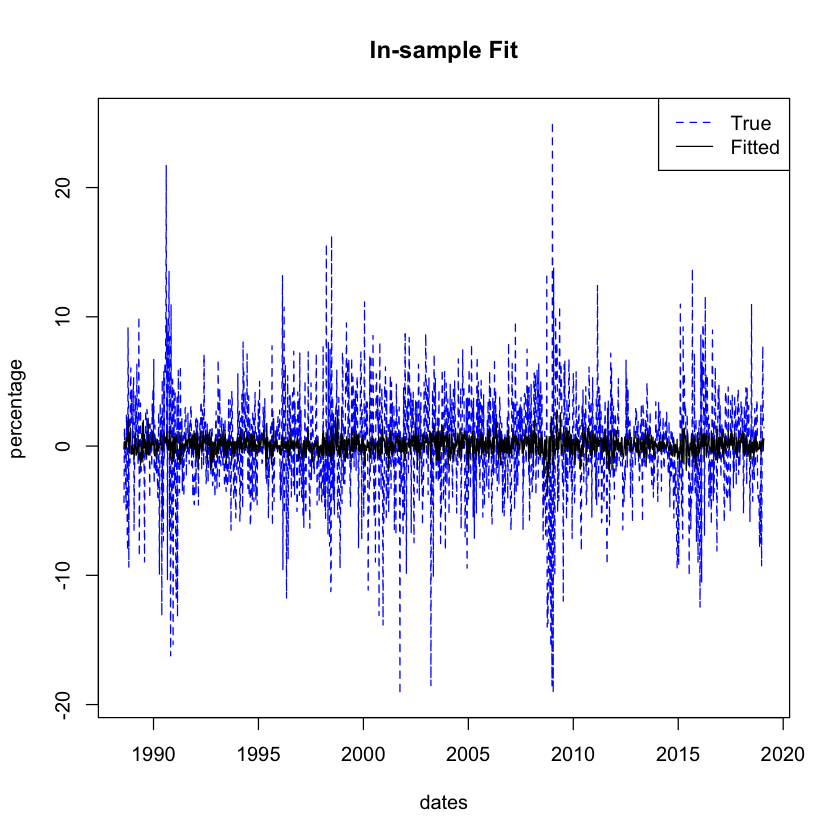

In [22]:
plot(lgoil,type='l',lty=2,main='In-sample Fit',ylab='percentage',xlab="dates",col="blue")
lines(fitvalue)
legend('topright',c('True','Fitted'),col=c("blue", "black"), lty=2:1)

In [23]:
nobs=length(window(lgoil,end=2016,frequency=365.25/7))

In [24]:
submodel=lm((window(lgoil,end=2016,frequency=365.25/7)[1:nobs-1])~(window(lgcopper,end=2016,frequency=365.25/7)[1:nobs-1])+(window(lgexchange,end=2016,frequency=365.25/7))[1:nobs-1])
summary(submodel)


Call:
lm(formula = (window(lgoil, end = 2016, frequency = 365.25/7)[1:nobs - 
    1]) ~ (window(lgcopper, end = 2016, frequency = 365.25/7)[1:nobs - 
    1]) + (window(lgexchange, end = 2016, frequency = 365.25/7))[1:nobs - 
    1])

Residuals:
    Min      1Q  Median      3Q     Max 
-19.759  -2.248   0.136   2.420  24.660 

Coefficients:
                                                                   Estimate
(Intercept)                                                         0.05278
window(lgcopper, end = 2016, frequency = 365.25/7)[1:nobs - 1]      0.06902
(window(lgexchange, end = 2016, frequency = 365.25/7))[1:nobs - 1] -0.70191
                                                                   Std. Error
(Intercept)                                                           0.11045
window(lgcopper, end = 2016, frequency = 365.25/7)[1:nobs - 1]        0.03013
(window(lgexchange, end = 2016, frequency = 365.25/7))[1:nobs - 1]    0.11582
                                         

In [25]:
predict=submodel$coef[1]+window(lgcopper,start=2016,frequency=365.25/7)*submodel$coef[2]+window(lgexchange,start=2016,frequency=365.25/7)*submodel$coef[3]
predict=ts(predict,start=start(window(lgcopper,start=2016,frequency=365.25/7)),freq=365.25/7)  

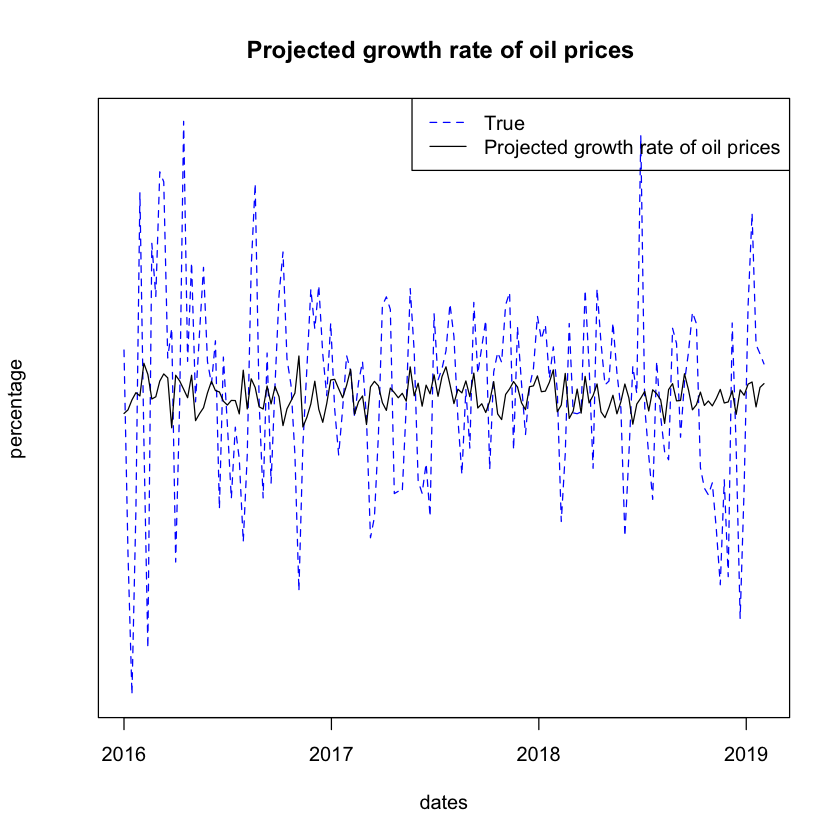

In [26]:
plot(window(lgoil,start=2016,frequency=365.25/7),type="l",lty=2, axes=F,main="Projected growth rate of oil prices ",ylab='percentage',xlab="dates", col = "blue")
lines(predict)
legend('topright',c('True','Projected growth rate of oil prices'),col=c("blue", "black"), lty=2:1)
axis(1,at=2016:2019,labels=2016:2019)
box()

In [27]:
predOP=data_ts[length(window(lgoil,end=2016,frequency=365.25/7)):(length(data_ts[,1])-1),1]*(1+predict/100)
predOP=ts(predOP,start=2016,freq=365.25/7)

In [30]:
oil_price=data_ts[,1]
true_change=diff(window(oil_price,start=2016))
demand_change=diff(predOP)
pro_demand=demand_change/true_change*100
pro_supply=100-pro_demand

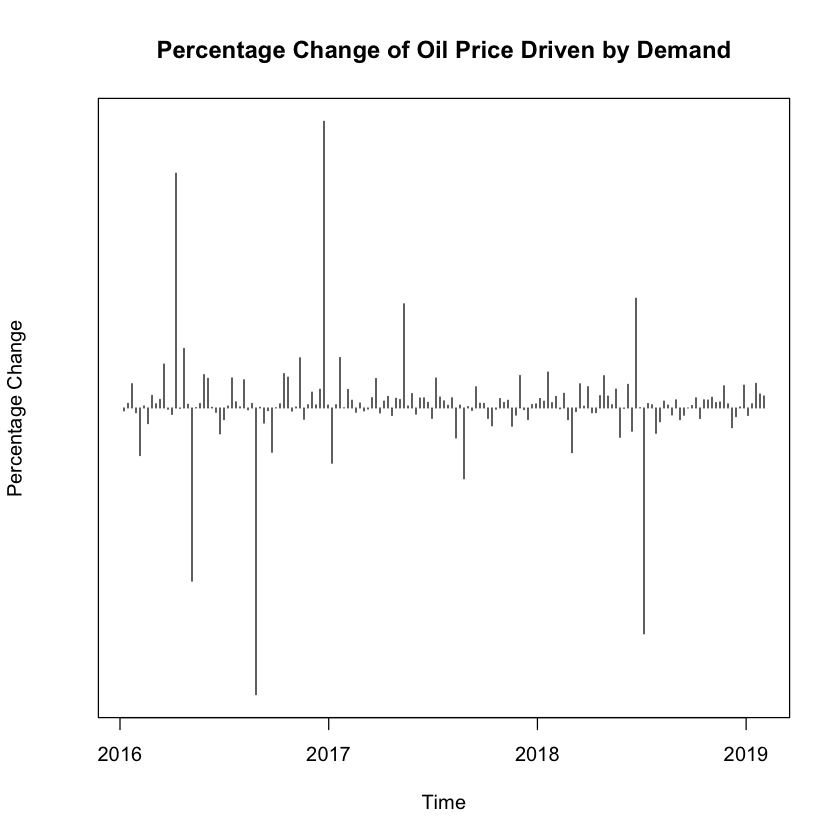

In [31]:
plot(pro_demand,type='h',axes=F,main='Percentage Change of Oil Price Driven by Demand',ylab='Percentage Change')
axis(1,at=2016:2019,labels=2016:2019)
box()

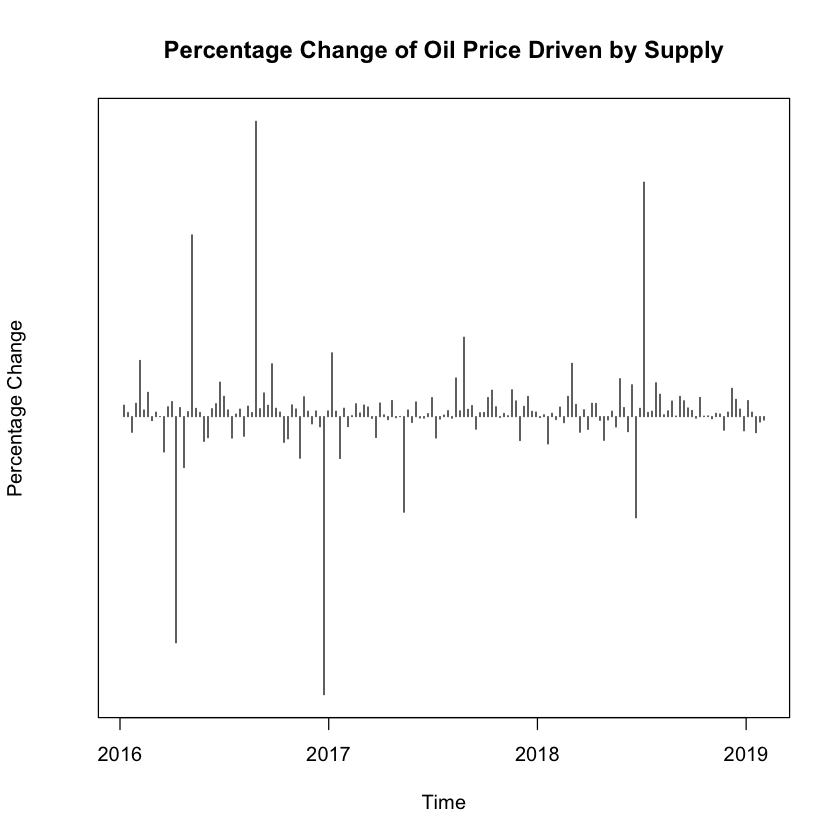

In [32]:
plot(pro_supply,type='h',axes=F,main='Percentage Change of Oil Price Driven by Supply',ylab='Percentage Change')
axis(1,at=2016:2019,labels=2016:2019)
box()